In [0]:
# Mounting Google Drive to the notebook

#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
#### LIBRARIES

# Utils

import time
import os
import glob
import numpy as np
from numpy import array
import random
import math
import cv2

# Visualization

import matplotlib.pyplot as plt

In [3]:
# First, upload .py files with files>upload (menu to the left)
# Lib functions as modules

import feature1_images_for_training as f1
import feature2_train_test_set as f2
import model_CNN
import train_function
import psnr

SyntaxError: ignored

In [0]:
# Keras 

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers.core import Activation
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.convolutional import UpSampling2D
from tensorflow.python.keras.layers.core import Flatten
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.layers.convolutional import Conv2D, Conv2DTranspose
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU, PReLU
from tensorflow.python.keras.layers import add
from tensorflow.python.keras.optimizers import Adam

In [0]:
#### STEP 0: DIRECTORIES SPECIFIED

random.seed(2019)
#os.getcwd()
path = "/content/drive/My Drive/SR_images"
os.chdir(path)


In [6]:
!ls


HR  LR	model.h5  Test_HR  Test_LR  weights_model.h5


In [11]:
#### STEP 1: FEATURES AND IMAGE TRANSFORMATIONS 

hr_paths = f1.get_paths("HR")
len(hr_paths)


1470

In [12]:
hr_paths_sample = np.random.choice(hr_paths, size=100, replace=False)
len(hr_paths_sample)

100

In [13]:
start_1 = time.time()

HR_cropped =f1.cropped_imgs(hr_paths_sample)
len(HR_cropped)

end_1 = time.time()

49155

In [0]:
#### STEP 2: TRAIN AND TEST SPLIT 

start_2 = time.time()

x_train_lr, x_train_hr, x_test_lr, x_test_hr =f2.train_test_data(HR_cropped, number_of_images = len(HR_cropped))

end_2 = time.time()

In [0]:
x_train_lr = f2.ndarray_to_4dim(x_train_lr, image_size = 16)
x_train_hr = f2.ndarray_to_4dim(x_train_hr, image_size = 32)
x_test_lr = f2.ndarray_to_4dim(x_test_lr, image_size = 16)
x_test_hr = f2.ndarray_to_4dim(x_test_hr, image_size = 32)

In [19]:
#### STEP 3: TRAIN MODEL

start_3 = time.time()

epochs = 5
batch_size = 200

generator, generated_train, loss, val_loss = train_function.train(x_train_lr = x_train_lr, x_train_hr = x_train_hr, epochs = epochs, batch_size = batch_size)

end_3 = time.time()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 16, 16, 3)    0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 64)   15616       input_1[0][0]                    
__________________________________________________________________________________________________
p_re_lu (PReLU)                 (None, 16, 16, 64)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 16, 64)   36928       p_re_lu[0][0]          

In [0]:
#### STEP 4: TEST AND PLOT

test_im = generator.evaluate(x_test_lr, x_test_hr)

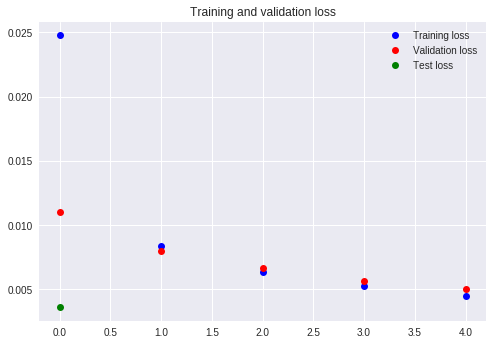

In [26]:
epoch = range(epochs)
plt.figure()
plt.plot(epoch, loss, 'bo', label='Training loss')
plt.plot(epoch, val_loss, 'ro', label='Validation loss')
plt.plot(test_im, 'go', label='Test loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
#Predict snippets

gen_imgs = generator.predict(x_test_lr)
len(gen_imgs)

4916

In [0]:
index = 20
result = gen_imgs[index]
test_hr = x_test_hr[index]
test_lr = x_test_lr[index]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


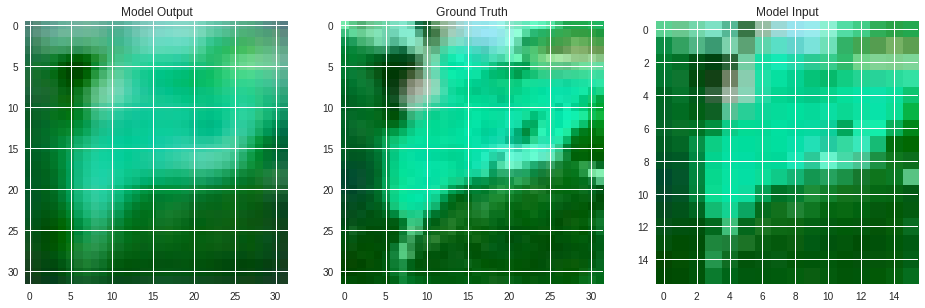

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(16, 16), sharey=False)
axs[0].imshow(result, interpolation='nearest')
axs[1].imshow(test_hr, interpolation='nearest')
axs[2].imshow(test_lr, interpolation='nearest')
axs[0].set_title("Model Output")
axs[1].set_title("Ground Truth")
axs[2].set_title("Model Input")
plt.show()


In [0]:
psnr_list = []
for i in range(len(gen_imgs)):
    psnr_item = psnr.psnr(gen_imgs[i], x_test_hr[i])
    psnr_list.append(psnr_item)
    

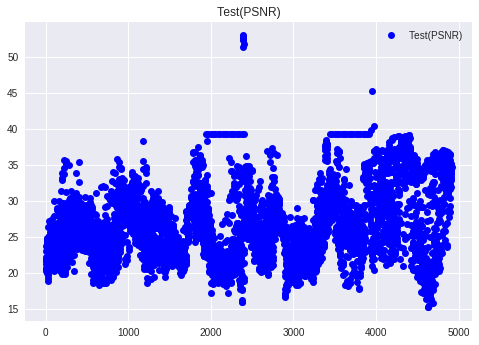

In [35]:
plt.figure()
plt.plot(psnr_list, 'bo', label='Test(PSNR)')
plt.title('Test(PSNR)')
plt.legend()
plt.show()

In [36]:
mean_psnr = np.mean(psnr_list)
mean_psnr   

26.628716362448884

In [0]:
hr_paths = f1.get_paths("HR")
hr_path = hr_paths[0]

In [21]:
hr_path

'/content/drive/My Drive/SR_images/HR/img_0048.jpg'

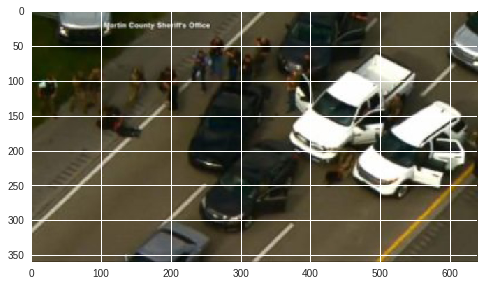

In [51]:
x = plt.imread(hr_path)
plt.imshow(x)

In [48]:
x.shape

AttributeError: ignored

In [0]:
image_size = 32
color_dim = 3
step = 21
padding = 6


HR=cv2.imread(hr_path)



In [45]:
HR

array([[[34, 53, 44],
        [34, 53, 44],
        [35, 54, 45],
        ...,
        [33, 53, 54],
        [25, 45, 46],
        [21, 41, 42]],

       [[40, 59, 50],
        [40, 59, 50],
        [40, 59, 50],
        ...,
        [30, 50, 51],
        [22, 42, 43],
        [18, 38, 39]],

       [[43, 64, 55],
        [43, 64, 55],
        [43, 64, 55],
        ...,
        [27, 45, 44],
        [20, 38, 37],
        [17, 35, 34]],

       ...,

       [[63, 85, 96],
        [63, 85, 96],
        [63, 85, 96],
        ...,
        [57, 76, 81],
        [56, 75, 80],
        [56, 75, 80]],

       [[50, 72, 83],
        [50, 72, 83],
        [50, 72, 83],
        ...,
        [45, 64, 69],
        [45, 64, 69],
        [45, 64, 69]],

       [[42, 64, 75],
        [42, 64, 75],
        [42, 64, 75],
        ...,
        [38, 57, 62],
        [38, 57, 62],
        [38, 57, 62]]], dtype=uint8)

In [0]:
if len(HR.shape) == 3: 
    h, w, c = HR.shape
else:
    h, w = HR.shape 

nx, ny = 0, 0
for x in range(0, h - image_size + 1, step):
    nx += 1; ny = 0
    for y in range(0, w - image_size + 1, step):
        ny += 1

        

In [0]:
HR_cropped = HR[x + padding: x + padding + image_size, y + padding: y + padding + image_size] 

In [41]:
type(HR_cropped)

numpy.ndarray

In [46]:
HR_cropped

array([[[48, 67, 72],
        [48, 67, 72],
        [48, 66, 73],
        ...,
        [49, 67, 74],
        [49, 67, 74],
        [49, 67, 74]],

       [[48, 67, 72],
        [49, 68, 73],
        [49, 67, 74],
        ...,
        [49, 67, 74],
        [49, 67, 74],
        [49, 67, 74]],

       [[49, 68, 73],
        [49, 68, 73],
        [50, 68, 75],
        ...,
        [49, 67, 74],
        [49, 67, 74],
        [49, 67, 74]],

       ...,

       [[46, 65, 72],
        [46, 65, 72],
        [46, 65, 72],
        ...,
        [49, 69, 74],
        [49, 69, 74],
        [49, 69, 74]],

       [[47, 66, 73],
        [47, 66, 73],
        [47, 66, 73],
        ...,
        [50, 70, 75],
        [50, 70, 75],
        [49, 69, 74]],

       [[50, 69, 76],
        [50, 69, 76],
        [50, 69, 76],
        ...,
        [51, 71, 76],
        [52, 71, 76],
        [52, 71, 76]]], dtype=uint8)

In [42]:
HR_cropped.shape

(32, 32, 3)

In [43]:
#x1 = plt.imread(HR_cropped)
#plt.imshow(x1)

TypeError: ignored

In [0]:
HR_cropped =  HR_cropped / 255.0

In [0]:
sample_1 = f2.ndarray_to_4dim(hr_paths, image_size = 16)
sample_1.shape
#x = plt.imread(sample)
#plt.imshow(x)

In [0]:
#### SUMMARISE RUNNING TIME

IMAGE_time = end_1 - start_1
SPLIT_time = end_2 - start_2
TRAIN_time = end_3 - start_3

print("IMAGE TRANSFORMATION TIME: ", IMAGE_time)
print("TRAIN-TEST SPLIT AND DOWNSAMPLING TIME: ", SPLIT_time)
print("TRAINING TIME: ", TRAIN_time)